<a href="https://colab.research.google.com/github/KacperGrodecki/image_proccessing/blob/main/kuba_img_manip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
!apt-get install poppler-utils 
!apt-get install tesseract-ocr-pol
!apt-get install libleptonica-dev 
!apt-get install tesseract-ocr
!apt-get install tesseract-ocr-dev
!apt-get install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-pol is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libleptonica-dev is already the newest version (1.75.3-3).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information...

In [19]:
pip install pytesseract 

In [20]:
pip install autocorrect

In [21]:
from PIL import Image 
import pytesseract 
import sys 
import os
import pandas as pd
import cv2 
import os
from PIL import Image
from pytesseract import image_to_string
import numpy as np
from matplotlib import pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from autocorrect import Speller
from matplotlib.pyplot import figure


In [22]:
def fig_prepare(file):
  rgb_image = cv2.imread(file)
  gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
  kernelSizes = (11, 11)
  gray_image_blurred = cv2.blur(gray_image,kernelSizes)
  gray_image_copy=gray_image.copy()
  gray_image_copy[(gray_image_blurred<150)&(gray_image_blurred>130)]=200
  
  return gray_image_copy

In [23]:
def text_from_image(image):
  image_correct=fig_prepare(image)
  custom_config_letters = r'--oem 3 --psm 3'
  custom_config_digits = r'--oem 3 --psm 3 outputbase digits'
  return (image_to_string(image_correct, lang='pol',config=custom_config_letters)),(image_to_string(image_correct, lang='pol',config=custom_config_digits))

In [24]:
myText,myDigits=text_from_image('drive/MyDrive/kuba/fig253.jpg')

In [70]:
  rgb_image = cv2.imread('drive/MyDrive/kuba/fig253.jpg')

  gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

  unique, counts = np.unique(gray_image, return_counts=True)
  hist_max=np.argmax(counts[120:180])+120

  kernelSizes = (11, 11)
  gray_image_blurred = cv2.blur(gray_image,kernelSizes)
  gray_image_copy=gray_image.copy()
  gray_image_copy[(gray_image<hist_max+15)&(gray_image>hist_max-15)]=hist_max_all+10

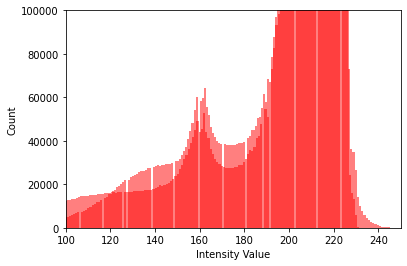

In [36]:
rgb_image = cv2.imread('drive/MyDrive/kuba/fig253.jpg')
gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
#_ = plt.hist(image.ravel(), bins = 256, color = 'orange', )
_ = plt.hist(gray_image[:, :].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(gray_image_blurred[:, :].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
plt.ylim(0,100000)
plt.xlim(100,250)
plt.show()
#w histogramie trzeba znaleźć dwa maksima- zarówno tła jak i napisu. przepisać zakres napisu do zakresu tła

In [43]:
gray_image.flatten()

array([224, 224, 224, ...,  52,  52,  52], dtype=uint8)

In [49]:
unique, counts = np.unique(gray_image, return_counts=True)

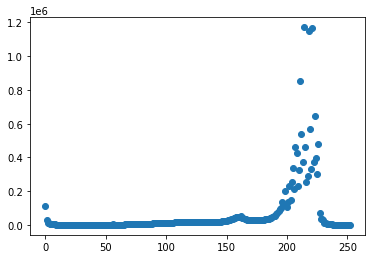

In [52]:
plt.scatter(unique,counts)

In [57]:
hist_max=np.argmax(counts[120:180])+120

In [59]:
hist_max_all=np.argmax(counts)

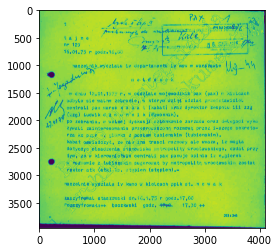

In [27]:
plt.imshow(gray_image_copy)

In [28]:
custom_config_letters = r'--oem 3 --psm 3'
print(image_to_string(gray_image_copy, lang='pol',config=custom_config_letters))

tajne
nr 129
16.01,75 r godz.16,00

 

naczelnik wydziaLu iv departamentu iV/msw w warszawie UJ-"M

W 4
od m e tv Ulnu/e
y |

w i wodu 12,01,1975 Ee, W oddziale wojewadzkim pax (pax) w kieLcach
odbylo sie waLne zebranie; w ktorym wziąt udział przeostawiciel
centrali pax marek Kadra ti (kabat) oraz dyrektor zespolu iii zzg
(zzg) Ludwik d/z wio n n i k (dzwonnik),

ja ' po zebraniu, w wotnej dyskusji-cztonkówie zarzadu oraz deLegaci wyka

r

zywaLi zainteresowania przęprowatzoną rozmową przez i=szego sekreta-
rza Kc pzer 8, Sierka z postem Łubienskim (Łubienskim),
kabat oswiadczyłŁ, ze nie/zna trasci rozmowy aLe uwaza, iz mogta
dotyczyc obsadzenia stanowiska metropolity wroctawskiego, dodał przy .
tym;sze,w kierownictwie centrali pax panuje opinia iz e,gierek

* j W rozwiowie z.Łubienskim sugerowat by metropolitą wrocławskim został
rektor atk (4tk)-.:s. stepien (stępien).,-

naczelnik wydzialu iv kwmo w kielcach pplk st, nowa k

rozszyfrowaŁ:++ boczkwski godz, +fPre- 17.350 ++

s 253 z 3

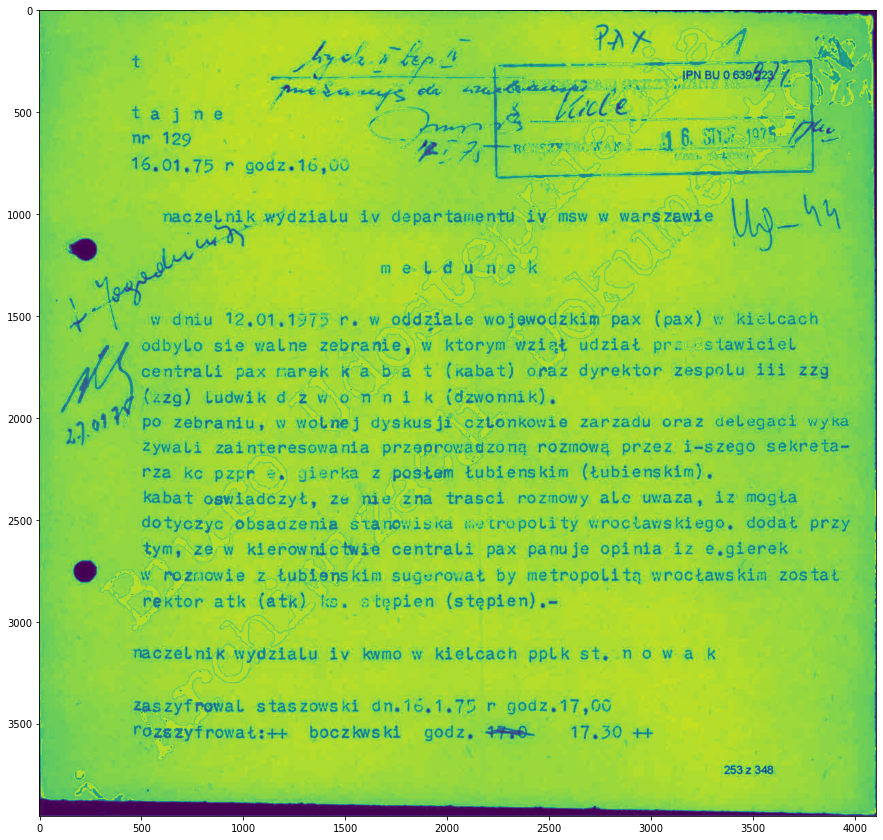

In [72]:
plt.figure(figsize=(15,15))
plt.imshow(gray_image_copy)

In [71]:
custom_config_letters = r'--oem 3 --psm 3'
print(image_to_string(gray_image_copy, lang='pol',config=custom_config_letters))

tajne
nr 129
16.01.75 r godz.16,00

aezeż ia 5 wydziaLu iv departamentu iv msw w warszawie a NK

e ŻA
ms me td u n. 8 UK

Paa) w dniu 12,01.1775 r» w ośdziale wojękądźii- pax (pax) w kieLcach
odbyLo sie walne zebranie, w ktorym Wziął udział przerstawiciel
centrali pax marek Ka ba t (kabat) oraz dyrektor zespolu iii zzg
(zzg) Ludwik d- NOS. ni k (dzwonnik),
po zebraniu, w wotnej dyskusji cztonkowie zarzadu oraz deLegaci wyka
zywaLi zainteresowania przeprowadzoną rozmową przez i=szego sekreta-
rza kc pzpr s, gierka z postem Łubienskim (Łubienskim),
kabat oswiadczył, ze nie zna trasci rozmowy aLe uwaza, iz mogta
dotyczyc obsadzenia śtanowiska ietropoLity wroctawskiego, dodat przy
tym; ze/w kierownictwie centrali pax panuje opinia iz e,gierek

* K W rozmowie z Łubienskim sugerowat by metropolitą wrocławskim został

5 fektor atk (atk) ks. stępien (stępien) .-

naczelnik wydzialu iv kwmo w kielcach ppLk st, nowak

zas zyf rowial staszowski dn.16.1.750 r godz.17,00
ozszyfrowat: ++ boczkwski g

In [29]:
import pytesseract
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
import pandas as pd
import cv2
from PIL import Image,ImageTk
from pytesseract import image_to_string
import numpy as np
import re
import matplotlib.pyplot as plt      
from tkinter.filedialog import askopenfilename
from skimage import io, color, morphology
import pickle
from os import listdir
from os.path import isfile, join
import gc
import sys

In [30]:
class Run():

    def __init__(self):
        print('start')
        self.countter = 0
        self.countter1 = 0
        self.labels = []
        self.xywh = []
        self.xywh1 = []
        self.path = 'drive/MyDrive/kuba/'
        self.files = [f for f in listdir(self.path) if isfile(join(self.path, f))]
        self.files.sort()
        self.contours = 0

    def setNumber(self,i):
        self.file_nr = i

    def openFile(self):
        print('opening file')
        self.file = self.path + self.files[self.file_nr]
        print(self.file)


    def findContour(self,ImageProcessing):
        print('find_contours')
        print('figure preprocessing')
        fig_prepared = ImageProcessing.figPrepare(self.file)
        print('figure prepered')
        print('find contours')
        self.contours, self.xywh = ImageProcessing.find_contours(fig_prepared)
        print('liczba konturów ', len(self.contours))
        return self.contours

    def readText(self, cropped_board):
        print('analyze figures')
        crop = Image.fromarray(cropped_board)
        try:
            let_crop = image_to_string(cropped_board, lang='pol', config='--psm 7 --oem 3')
        except:
            let_crop = ''
        try:
            div_crop = image_to_string(cropped_board, lang='pol', config='--psm 6 --oem 3')
        except:
            let_crop = ''
        if re.search('[a-zA-Z]', let_crop) or re.search('[a-zA-Z]', div_crop):
            dig_crop = image_to_string(cropped_board, lang='pol', config='--psm 7 --oem 3 -c tessedit_char_whitelist=0123456789')  # r'--oem 3 --psm 3 outputbase digits'
            # let_board=image_to_string(cropped_board, lang='pol',config = '--psm 13 --oem3')
            # plt.imshow(crop)
            # plt.show()
            # input('Press Enter to countinue')
            print(let_crop, div_crop)
            return let_crop, div_crop
        else:
            return '',''

In [35]:
class ImageProcessing:

    def figPrepare(self, file):
        rgb_image = cv2.imread(file)
        gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
        kernelSizes = (11, 11)
        gray_image_blurred = cv2.blur(gray_image,kernelSizes)
        gray_image_copy=gray_image.copy()
        gray_image_copy[(gray_image_blurred<150)&(gray_image_blurred>130)]=200

        return gray_image_copy

    def countrurs(self, gray, ythresh):
        thresh = 255 - gray
        # use morphology erode to blur horizontally
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (151, 3))
        morph = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)

        # use morphology open to remove thin lines from dotted lines
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 17))
        morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

        # find contours
        # tzreba wywietlić kontury z obrazkiem
        cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

        # find the topmost box

        for c in cntrs:
            box = cv2.boundingRect(c)
            x, y, w, h = box
            if y < ythresh:
                topbox = box
                ythresh = y
        return cntrs[::-1], topbox

    # loading contours
    def find_contours(self, file):
        print('find contours ')
        # file=path+file+'.jpg'
        image = file
        # gray=self.fig_prepare(image)

        # image = cv2.imread(file)
        result = image.copy()
        ythresh = 1000
        cntrs, topbox = self.countrurs(image, ythresh)
        i = 0
        images = []
        xywh = []
        for c in cntrs:
            box = cv2.boundingRect(c)
            if box != topbox:
                i = i + 1
                x, y, w, h = box

                xywh.append([x, y, w, h])

                cv2.rectangle(result, (x, y), (x + w, y + h), (0, 0, 255), 2)
                cropped = image[y:y + h, x:x + w]

                # mask,mask1 = self.mask_from_cropped(cropped)
                board = 50
                cropped_board = cv2.copyMakeBorder(cropped, board, board, board, board, cv2.BORDER_CONSTANT,
                                                   value=[255, 255, 255])
                # mask = cv2.copyMakeBorder( mask, board, board, board, board, cv2.BORDER_CONSTANT,value=[255, 255, 255])
                # mask1 = cv2.copyMakeBorder( mask1, board, board, board, board, cv2.BORDER_CONSTANT,value=[255, 255, 255])

                images.append(cropped_board)
        return images, xywh


In [ ]:
'''
imageProcessing=ImageProcessing()
run=Run()

for i in range(0,400):
    print('-------------------------',i,'--------------------------')
    #ImageProcessing
    run.setNumber(i)
    run.openFile()
    contours=run.findContour(imageProcessing)
    print(len(contours))
    j=0
    text=[]
    for contour in contours:
        print(j)
        line,div=run.readText(contour)
        text.append([line,div])
        j+=1
    text_df=pd.DataFrame(np.array(text))
    print(j,' text_df shape ',text_df.shape)
 #   break

In [ ]:
'''
imageProcessing=ImageProcessing()
run=Run()

for i in range(0,400):
    print('-------------------------',i,'--------------------------')
    #ImageProcessing
    run.setNumber(i)
    run.openFile()
    contours=run.findContour(imageProcessing)
    print(len(contours))
    j=0
    text=[]
    for contour in contours:
        print(j)
        line,div=run.readText(contour)
        text.append([line,div])
        j+=1
    text_df=pd.DataFrame(np.array(text))
    print(j,' text_df shape ',text_df.shape)
 #   break